In [1]:
#imports all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
data = pd.read_csv("SampleSuperstore - SampleSuperstore.csv")
data.head()       #looking at first five rows of data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
print("Shape of the data:", data.shape)
        

Shape of the data: (9994, 13)


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data.info()                           #getting informations about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()                               #describe() provides info about the continuous data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data['Profit'].value_counts(normalize = True, bins = 7)               #Value counts in frequency or say percent of profits by making groups of profits into 7

(-171.426, 1971.424]      0.979688
(-2314.277, -171.426]     0.018111
(1971.424, 4114.275]      0.001101
(-4457.127, -2314.277]    0.000500
(4114.275, 6257.125]      0.000300
(6257.125, 8399.976]      0.000200
(-6614.979, -4457.127]    0.000100
Name: Profit, dtype: float64

In [8]:
#Calculating the cost
data['Cost'] = data['Sales'] - data['Profit']

#calculating profit %
data['Profit %'] = (data['Profit']/data['Cost'])*100

In [9]:
data.iloc[0:4,:]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429


In [10]:
data.corr()                  #analyzing the correlation among continuous data

,Postal Code,Sales,Quantity,Discount,Profit,Cost,Profit %
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.014247,-0.056863
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064,0.927710,-0.060972
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253,0.199012,0.001901
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487,0.061448,-0.773335
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.116757,0.215752
Cost,-0.014247,0.927710,0.199012,0.061448,0.116757,1.000000,-0.160742
Profit %,-0.056863,-0.060972,0.001901,-0.773335,0.215752,-0.160742,1.000000


Text(0.5, 1, 'Correlation between variables')

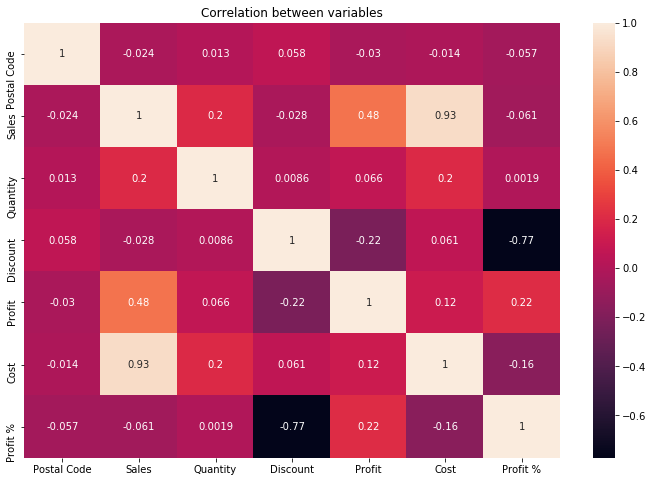

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot =True)             #ploting a heatmap to better visualize the correlation among variables
plt.title("Correlation between variables")

In [12]:
## Analyze and see which is best mode for shipping the data

In [13]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

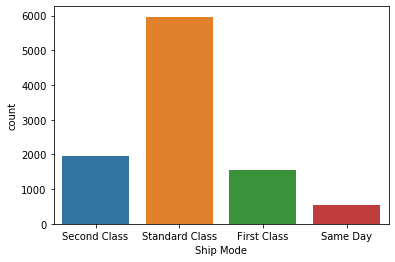

In [14]:
sns.countplot(x= data['Ship Mode'])          #ploting a countplot which shows the ways of ship mode and the number of times those ways are used 

In [15]:
## Now analyze the customer segment
data["Segment"].value_counts(normalize = True)

Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


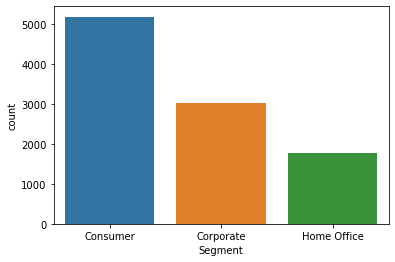

In [16]:
sns.countplot(data['Segment'])

In [ ]:
#category wise analysis
data["Category"].value_counts(normalize=True)   

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


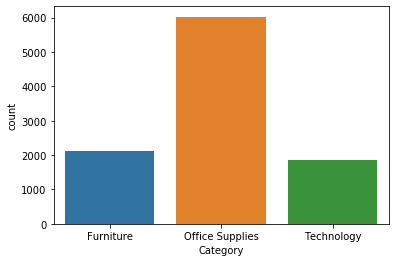

In [18]:
#from value counts we can see that office supplies is more i.e..60.2962%
#we can also visualize this bby coutplot a kind of histogram

sns.countplot(data["Category"])

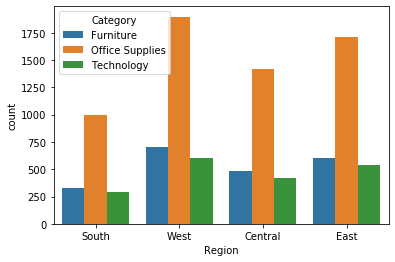

In [19]:
sns.countplot(x = data['Region'], hue=data['Category'])

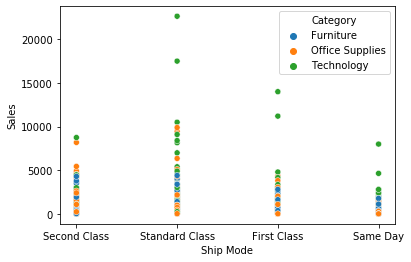

In [20]:
sns.scatterplot(x = data["Ship Mode"], y = data["Sales"], hue = data["Category"])

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Category-wise Profit and Sale')

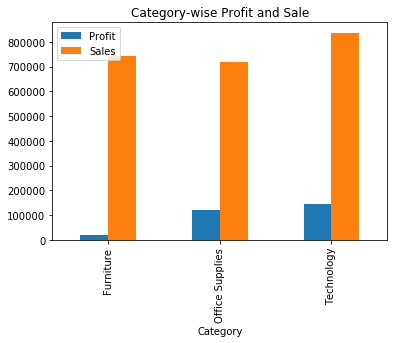

In [21]:
ds =data.groupby('Category')['Profit','Sales'].agg('sum')
print(ds)
ds.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit and Sale')

In [24]:
data['Sub-Category'].unique().sort()

In [25]:
df = list(data['Sub-Category'].unique())


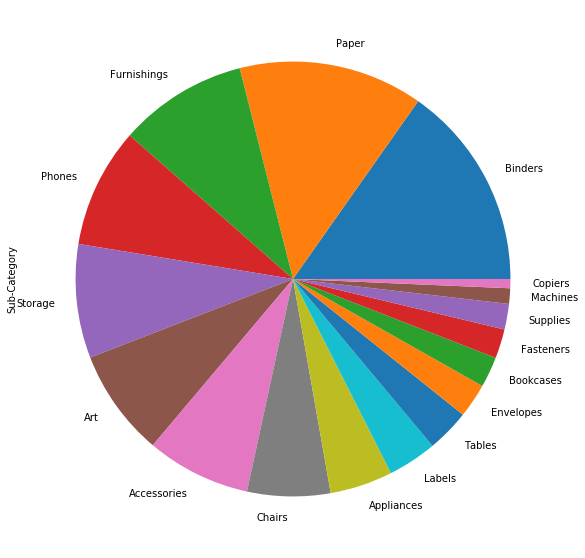

In [26]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie()      #autopct display percent value

In [27]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Region-wise Profit and Sales')

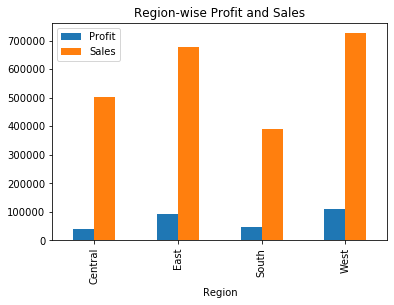

In [28]:
rw =data.groupby('Region')['Profit','Sales'].agg('sum')
rw.plot.bar()
plt.legend(loc='upper left')
plt.title('Region-wise Profit and Sales')

In [29]:
city = list(data["City"].unique())
city.sort()
city

['Aberdeen',
 'Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Anaheim',
 'Andover',
 'Ann Arbor',
 'Antioch',
 'Apopka',
 'Apple Valley',
 'Appleton',
 'Arlington',
 'Arlington Heights',
 'Arvada',
 'Asheville',
 'Athens',
 'Atlanta',
 'Atlantic City',
 'Auburn',
 'Aurora',
 'Austin',
 'Avondale',
 'Bakersfield',
 'Baltimore',
 'Bangor',
 'Bartlett',
 'Bayonne',
 'Baytown',
 'Beaumont',
 'Bedford',
 'Belleville',
 'Bellevue',
 'Bellingham',
 'Bethlehem',
 'Beverly',
 'Billings',
 'Bloomington',
 'Boca Raton',
 'Boise',
 'Bolingbrook',
 'Bossier City',
 'Bowling Green',
 'Boynton Beach',
 'Bozeman',
 'Brentwood',
 'Bridgeton',
 'Bristol',
 'Broken Arrow',
 'Broomfield',
 'Brownsville',
 'Bryan',
 'Buffalo',
 'Buffalo Grove',
 'Bullhead City',
 'Burbank',
 'Burlington',
 'Caldwell',
 'Camarillo',
 'Cambridge',
 'Canton',
 'Carlsbad',
 'Carol Stream',
 'Carrollton',
 'Cary',
 'Cedar Hill',
 'Cedar Rapids',
 'Champaign',
 'Chandler',
 

In [30]:
city_data = data['City'].value_counts()
print(city_data.describe())


count    531.000000
mean      18.821092
std       68.446757
min        1.000000
25%        2.500000
50%        5.000000
75%       12.000000
max      915.000000
Name: City, dtype: float64
